# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')
train_data = dataset.iloc[:,1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_data_scaled = sc.fit_transform(train_data) 

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(train_data_scaled[i - 60:i, 0])
    y_train.append(train_data_scaled[i,0])
X_train , y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dense , Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(Input(shape=(X_train.shape[1],1)))
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer= 'adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0971
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0067
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0054
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0056
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0051
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0047
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0053
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0049
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0044
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0050
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_prices = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [23]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_prices = regressor.predict(X_test)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


### Visualising the results

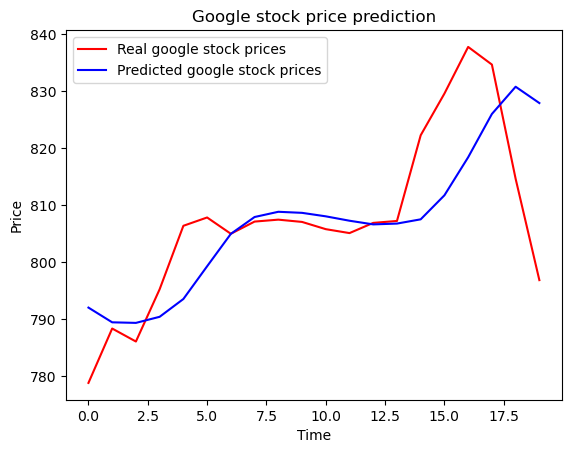

In [24]:
plt.plot(real_stock_prices, color = 'red', label = 'Real google stock prices')
plt.plot(predicted_stock_prices, color = 'blue' , label = 'Predicted google stock prices')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()